# Single Variate Analysis on Product Type 
From the kaggle website, it is seen that there are 71 unique product types. For the scope of this project, the type of products sold will be narrowed to the top ten product types with the highest volume of sales over the years. 

Similar to parts 1 and 2, the data has to be cleaned. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv")
olist_order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv")
olist_order_items_dataset = pd.read_csv("olist_order_items_dataset.csv")
olist_products_dataset = pd.read_csv("olist_products_dataset.csv")
product_category_name_translation = pd.read_csv("product_category_name_translation.csv")

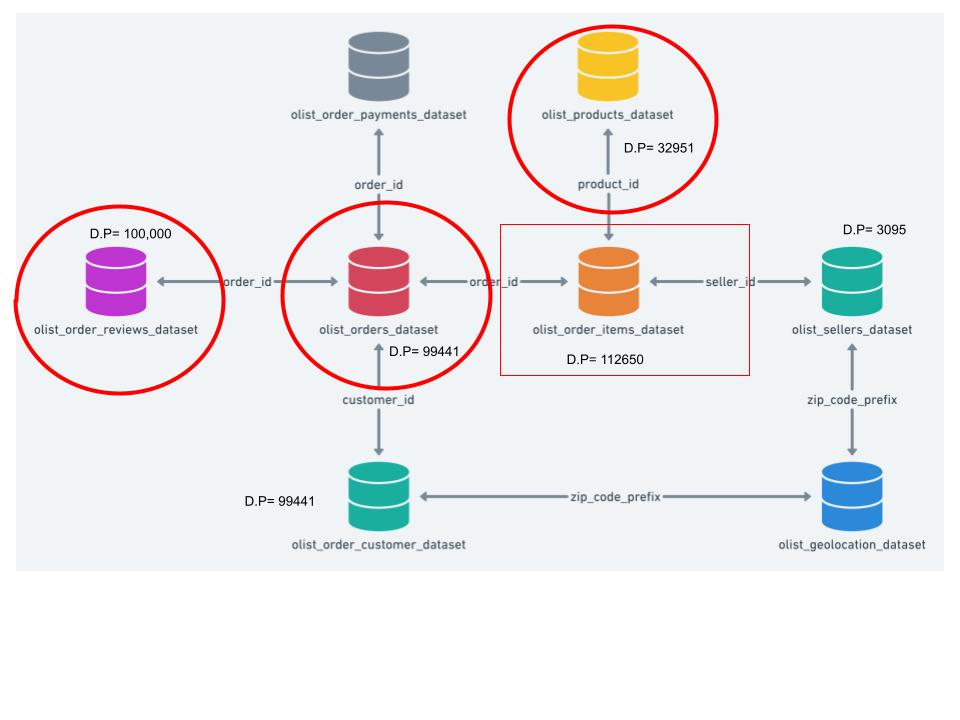

In [3]:
olist_merge = olist_orders_dataset.merge(olist_order_reviews_dataset, on="order_id", how = 'left')
olist_merge = olist_merge.merge(olist_order_items_dataset, on="order_id", how = 'left')
olist_merge = olist_merge.merge(olist_products_dataset, on="product_id", how = 'left')
olist_merge.drop_duplicates(subset=["review_score", "order_id"], inplace = True)

In [4]:
olist_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99650 entries, 0 to 114099
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99650 non-null  object 
 1   customer_id                    99650 non-null  object 
 2   order_status                   99650 non-null  object 
 3   order_purchase_timestamp       99650 non-null  object 
 4   order_approved_at              99490 non-null  object 
 5   order_delivered_carrier_date   97860 non-null  object 
 6   order_delivered_customer_date  96672 non-null  object 
 7   order_estimated_delivery_date  99650 non-null  object 
 8   review_id                      99650 non-null  object 
 9   review_score                   99650 non-null  int64  
 10  review_comment_title           11704 non-null  object 
 11  review_comment_message         41646 non-null  object 
 12  review_creation_date           99650 non-null

In [5]:
dataAnalysis = pd.DataFrame(olist_merge[['review_score', 'price', 'freight_value','product_description_lenght', 'product_photos_qty','product_category_name', 'order_status', 'order_purchase_timestamp']])

In [6]:
dataAnalysis = dataAnalysis.loc[(dataAnalysis["order_status"]=="delivered")]

In [7]:
dataAnalysis["product_category_name"] = dataAnalysis['product_category_name'].astype('category')

# Start of Analysis after cleaning 
Every variable in the product type csv is compared to see if there is any relationship between the variable and review score. 
Following from part 2, a bar plot is being used because a boxplot does not clearly show the relationship visually. Additionally, the relationship may not be linear. Using a bar plot will be visually easier to analyse. 

<AxesSubplot:xlabel='review_score', ylabel='price'>

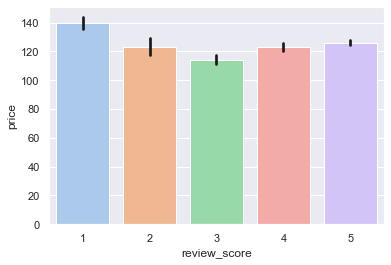

In [8]:
sb.barplot(x='review_score', y='price', data=olist_merge, palette ="pastel" , errcolor='k')

From the above graph, it seems that the correlation is quadratic. The review score of 3 has the lowest price. Intuitively, the review score of 5 should have the lowest price since many people would want their products to cost less. This is especially so in Brazil where the economy is still growing and there is a large population of middle class citizens who would want to save money. However,that is not visible from the graph as the rpice range for review score 5 is similar to that of review score 2 and 4. Meaning to say that there may be other variables that could be of more significant to affect eh review score.

<AxesSubplot:xlabel='review_score', ylabel='product_description_lenght'>

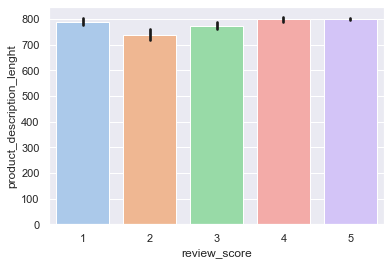

In [9]:
sb.barplot(x='review_score', y='product_description_lenght', data=olist_merge, palette ="pastel" , errcolor='k')

For **exploration purposes**, the product description length was plotted against review score. There is no correlation. 

<AxesSubplot:xlabel='review_score', ylabel='freight_value'>

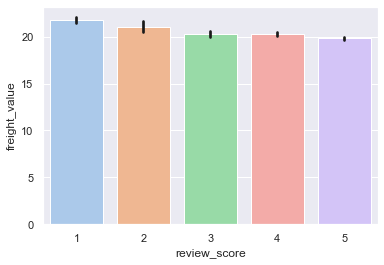

In [10]:
sb.barplot(x='review_score', y='freight_value', data=olist_merge, palette ="pastel" , errcolor='k')

From the above graph, it can be seen that freight value does affect the review score. With lower freight value having a higher review score. Both variables share a negative correlation. Hence, using the .corr() and heatmap functions from the seaborn module, it can be determined whether it is linearly correlated or not. 

<AxesSubplot:>

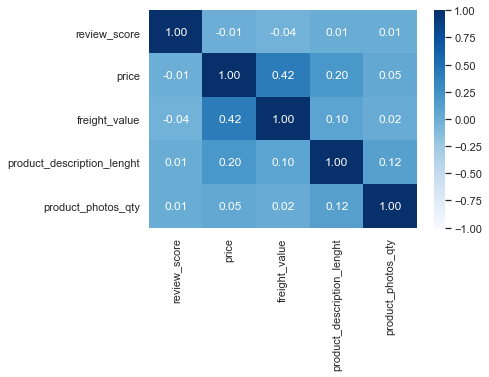

In [11]:
sb.heatmap(dataAnalysis.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", cmap ="Blues")

From the above heatmap, freight value and review score do not have linear correlation. However, they could be related in a different way. 

# Bivariate Analysis for product type
1. Sort product type by ascending top ten 
2. Sort product type by descending top ten
3. Make them into a list respectively called topten and bottomten
4. Narrow down the variables by creating a new dataframe
5. Then draw a boxplot of the variables against review score

A box plot can be used as both review score and product type are categorical variables. 

In [12]:
dataAnalysis['product_category_name'].value_counts()[:10].sort_values(ascending = True).index

CategoricalIndex(['brinquedos', 'automotivo', 'telefonia',
                  'relogios_presentes', 'utilidades_domesticas',
                  'moveis_decoracao', 'informatica_acessorios',
                  'esporte_lazer', 'beleza_saude', 'cama_mesa_banho'],
                 categories=['agro_industria_e_comercio', 'alimentos', 'alimentos_bebidas', 'artes', 'artes_e_artesanato', 'artigos_de_festas', 'artigos_de_natal', 'audio', ...], ordered=False, dtype='category')

In [13]:
dataAnalysis['product_category_name'].value_counts()[61:71].sort_values().index

CategoricalIndex(['fashion_roupa_infanto_juvenil', 'la_cuisine',
                  'cds_dvds_musicais',
                  'portateis_cozinha_e_preparadores_de_alimentos',
                  'casa_conforto_2', 'artes_e_artesanato', 'fashion_esporte',
                  'fraldas_higiene', 'flores', 'fashion_roupa_feminina'],
                 categories=['agro_industria_e_comercio', 'alimentos', 'alimentos_bebidas', 'artes', 'artes_e_artesanato', 'artigos_de_festas', 'artigos_de_natal', 'audio', ...], ordered=False, dtype='category')

In [14]:
#Narrowing down the top ten sold products becasue it is easier to do so
topten = ['brinquedos', 'automotivo', 'telefonia',
                  'relogios_presentes', 'utilidades_domesticas',
                  'moveis_decoracao', 'informatica_acessorios',
                  'esporte_lazer', 'beleza_saude', 'cama_mesa_banho']

topTenAnalysis = dataAnalysis.loc[(dataAnalysis["product_category_name"].isin(topten))]
toptenenglish = product_category_name_translation.loc[(product_category_name_translation["product_category_name"].isin(topten))]
topTenAnalysis = pd.merge(topTenAnalysis,toptenenglish,how="left",on="product_category_name")

<AxesSubplot:xlabel='review_score', ylabel='product_category_name_english'>

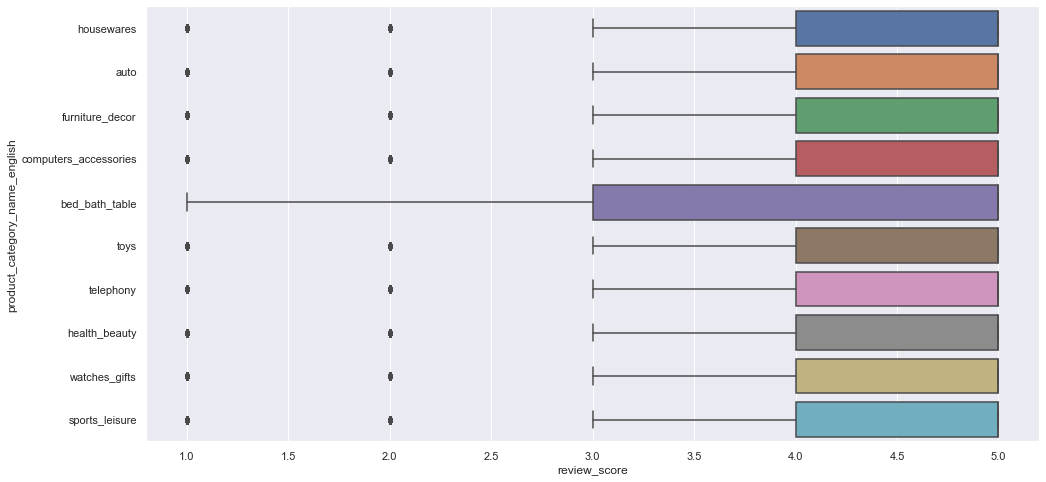

In [15]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'product_category_name_english', data = topTenAnalysis)

The above boxplot shows the top ten product categories sold and putting it against the review score. With 9 of the product categories having scored similarly with majority of their revew scores being 3-5 and only 1 product category,bed_bath_table, having a wider range of scores,1-5, than the other 9.There is no obvious relationship between the product categories and review score.

In [16]:
#Narrowing down the bottom ten sold products becasue it is easier to do so
bottomten = ['fashion_roupa_infanto_juvenil', 'la_cuisine',
                  'cds_dvds_musicais',
                  'portateis_cozinha_e_preparadores_de_alimentos',
                  'casa_conforto_2', 'artes_e_artesanato', 'fashion_esporte',
                  'fraldas_higiene', 'flores', 'fashion_roupa_feminina']

bottomTenAnalysis = dataAnalysis.loc[(dataAnalysis["product_category_name"].isin(bottomten))]
bottomtenenglish = product_category_name_translation.loc[(product_category_name_translation["product_category_name"].isin(bottomten))]
bottomTenAnalysis = pd.merge(bottomTenAnalysis,bottomtenenglish,how="left",on="product_category_name")

<AxesSubplot:xlabel='review_score', ylabel='product_category_name_english'>

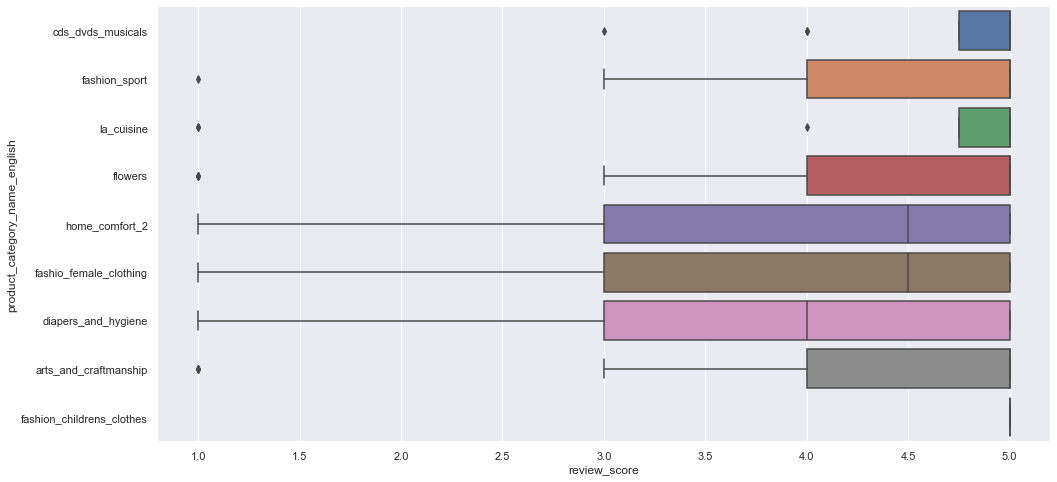

In [17]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'product_category_name_english', data = bottomTenAnalysis)

The above boxplot shows the bottom ten product categories sold and putting it against the review score. Majority of their review scores are above 3 and some product category seems to have insuffificent data to present a boxplot.

# The product type does not affect review score
From here it can be seen that product type does not affect review score. From a business perspective, the bottom ten product types have lowest count from 2016 to 2018. This suggest that these product types may not be a good investment as consumers are not really buying such products. Top Ten product types sold more and they do seem to be the more profitable product types. On the other hand, as the Top 10 product types are more popular, sellers may have to deal with stiff competition from other sellers hence,having high review scores alone is unlikey enough to beat the competition.

# By year 
The product types are analysed by year, to see how the review scores of these products change by year and which product types are consistently the most popular each year.

In [18]:
year2017 = dataAnalysis.loc[(dataAnalysis["order_purchase_timestamp"]>="2017-01-01") & (dataAnalysis["order_purchase_timestamp"]<="2018-01-01")]
year2017['product_category_name'].value_counts()[:10].sort_values(ascending = True).index

CategoricalIndex(['telefonia', 'relogios_presentes', 'cool_stuff',
                  'utilidades_domesticas', 'brinquedos',
                  'informatica_acessorios', 'moveis_decoracao', 'beleza_saude',
                  'esporte_lazer', 'cama_mesa_banho'],
                 categories=['agro_industria_e_comercio', 'alimentos', 'alimentos_bebidas', 'artes', 'artes_e_artesanato', 'artigos_de_festas', 'artigos_de_natal', 'audio', ...], ordered=False, dtype='category')

<AxesSubplot:xlabel='review_score', ylabel='product_category_name_english'>

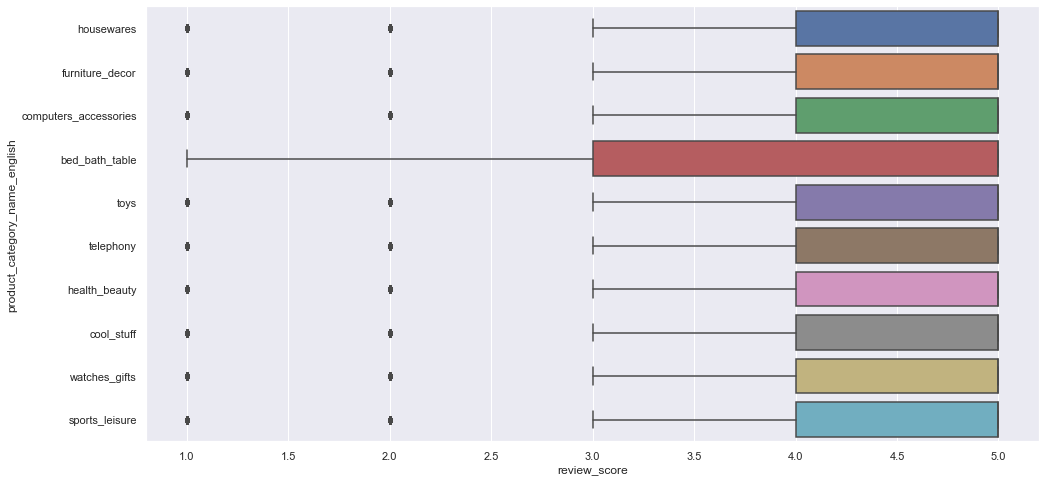

In [19]:
topten2017 = ['telefonia', 'relogios_presentes', 'cool_stuff',
                  'utilidades_domesticas', 'brinquedos',
                  'informatica_acessorios', 'moveis_decoracao', 'beleza_saude',
                  'esporte_lazer', 'cama_mesa_banho']
top2017 = dataAnalysis.loc[(dataAnalysis["product_category_name"].isin(topten2017))]
toptenenglish = product_category_name_translation.loc[(product_category_name_translation["product_category_name"].isin(topten2017))]
top2017 = pd.merge(top2017,toptenenglish,how="left",on="product_category_name")
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'product_category_name_english', data = top2017)

Top Ten Product Categories with the highest volume of Sales in 2017

In [20]:
year2016 = dataAnalysis.loc[(dataAnalysis["order_purchase_timestamp"]>="2016-01-01") & (dataAnalysis["order_purchase_timestamp"]<="2017-01-01")]
year2016['product_category_name'].value_counts()[:10].sort_values(ascending = True).index

CategoricalIndex(['fashion_bolsas_e_acessorios', 'automotivo',
                  'utilidades_domesticas', 'bebes', 'informatica_acessorios',
                  'esporte_lazer', 'brinquedos', 'perfumaria', 'beleza_saude',
                  'moveis_decoracao'],
                 categories=['agro_industria_e_comercio', 'alimentos', 'alimentos_bebidas', 'artes', 'artes_e_artesanato', 'artigos_de_festas', 'artigos_de_natal', 'audio', ...], ordered=False, dtype='category')

<AxesSubplot:xlabel='review_score', ylabel='product_category_name_english'>

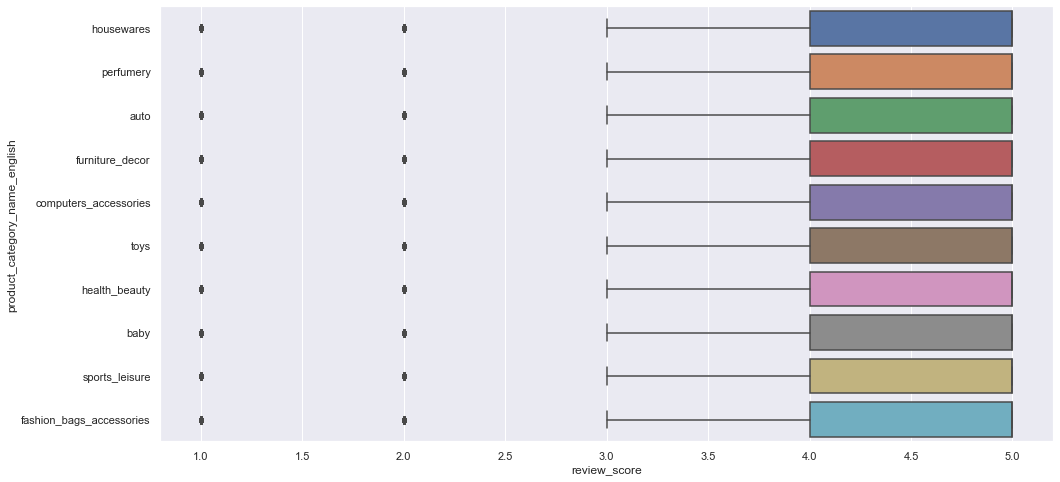

In [21]:
topten2016 = ['fashion_bolsas_e_acessorios', 'automotivo',
                  'utilidades_domesticas', 'bebes', 'informatica_acessorios',
                  'esporte_lazer', 'brinquedos', 'perfumaria', 'beleza_saude',
                  'moveis_decoracao']
top2016 = dataAnalysis.loc[(dataAnalysis["product_category_name"].isin(topten2016))]
toptenenglish = product_category_name_translation.loc[(product_category_name_translation["product_category_name"].isin(topten2016))]
top2016 = pd.merge(top2016,toptenenglish,how="left",on="product_category_name")
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'product_category_name_english', data = top2016)

Top Ten Product Categories with the highest volume of Sales in 2016

In [22]:
year2018 = dataAnalysis.loc[(dataAnalysis["order_purchase_timestamp"]>="2018-01-01") & (dataAnalysis["order_purchase_timestamp"]<="2019-01-01")]
year2018['product_category_name'].value_counts()[:10].sort_values(ascending = True).index

CategoricalIndex(['eletronicos', 'telefonia', 'automotivo', 'moveis_decoracao',
                  'utilidades_domesticas', 'relogios_presentes',
                  'esporte_lazer', 'informatica_acessorios', 'cama_mesa_banho',
                  'beleza_saude'],
                 categories=['agro_industria_e_comercio', 'alimentos', 'alimentos_bebidas', 'artes', 'artes_e_artesanato', 'artigos_de_festas', 'artigos_de_natal', 'audio', ...], ordered=False, dtype='category')

<AxesSubplot:xlabel='review_score', ylabel='product_category_name_english'>

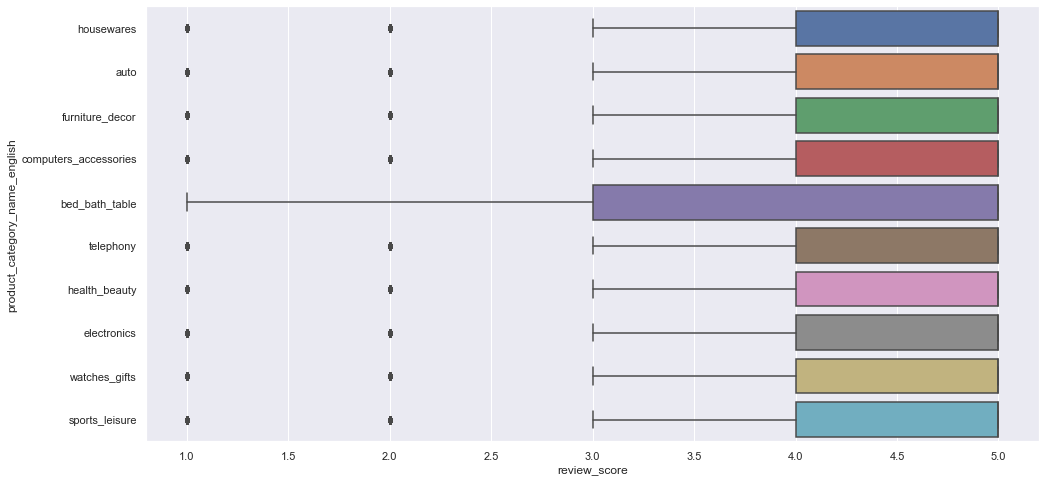

In [23]:
topten2018 = ['eletronicos', 'telefonia', 'automotivo', 'moveis_decoracao',
                  'utilidades_domesticas', 'relogios_presentes',
                  'esporte_lazer', 'informatica_acessorios', 'cama_mesa_banho',
                  'beleza_saude']
top2018 = dataAnalysis.loc[(dataAnalysis["product_category_name"].isin(topten2018))]
toptenenglish = product_category_name_translation.loc[(product_category_name_translation["product_category_name"].isin(topten2018))]
top2018 = pd.merge(top2018,toptenenglish,how="left",on="product_category_name")
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'product_category_name_english', data = top2018)

Top Ten Product Categories with the highest volume of Sales in 2018

# Check Point and Analysis 
Since the project ultimately aims to predict over time, it is necessary to know which products remain in top ten over the years. Additionally, product categories that stay in the top ten are more profitable since it has sustained high levels of demand.

These product categories are:
1. Houseware 
2. Auto
3. Furniture decor
4. Computer accessories 
5. Health & beauty 
6. Sports leisure

These are the 6 product types that have consistently remained in the top ten position over these three years. Hence it is the best to use these product types for the project. Also, for people that would want to start and e-commerce buisness in Olist and would like to possibly achieve the likelyhood of high volume of sales, they could invest in these 6 product categories.